## Data Preprocessing
The purpose of this notebook is to demo the data preprocessing flow to preprocess signal traces from the STEAD seismic signal dataset for use in CNN model training. See `data_preprocessing` module for more.

### Environment setup

In [2]:
%matplotlib inline
import os
import sys
sys.path.append('/content/drive/MyDrive/Earthquake_Detection')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image

from earthquake_detection.data_preprocessing import DataPreprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
plt.ioff() # Turn off matplotlib interactive mode to ensure plots are fully clearing from memory after saving to array. Prevents  memory leakage.

### Parameters

In [4]:
SUBSAMPLE_N = 20000
WEIGHTED = True

### Get paths to saved dataset files

In [5]:
# Get data directory path to the locally saved STEAD dataset files from saved environment variable
data_dir_path = r"/content/drive/MyDrive/Earthquake_Detection/DATA"

In [6]:
data_dir_path

'/content/drive/MyDrive/Earthquake_Detection/DATA'

### Data preprocessing

In [7]:
# Initialize DataPreprocessing object
preproc = DataPreprocessing(data_dir_path=data_dir_path, subsample_n=SUBSAMPLE_N, weighted=WEIGHTED)

Fetching data paths from directory
Parsing metadata from csv files


100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


Number of total traces: 50000
Number of earthquake traces: 30000
Number of noise traces: 20000
Fetching subsample of traces from hdf5 files
Weighting random sample based on category label
Parsing traces from h5py filepaths


100%|██████████| 1/1 [01:55<00:00, 115.42s/it]


In [8]:
raw_signals = preproc.subsample_traces
metadata = preproc.subsample_metadata

In [9]:
# Định nghĩa đường dẫn Drive
output_folder = '/content/drive/MyDrive/Earthquake_Detection/DATA1'
os.makedirs(output_folder, exist_ok=True)

# Lưu raw signals
signals = np.array(list(raw_signals.values()))
np.save(os.path.join(output_folder, f'extracted_raw_signals_subsample_{SUBSAMPLE_N}.npy'), signals)

# Lưu metadata dưới dạng feather
metadata.to_feather(os.path.join(output_folder, f'extracted_metadata_subsample_{SUBSAMPLE_N}.feather'))

print(f'Done. Files saved in {output_folder}')


Done. Files saved in /content/drive/MyDrive/Earthquake_Detection/DATA1


In [10]:
waveform_imgs = preproc.create_waveform_images(img_width=3, img_height=1, img_dpi=100)

# Lưu waveform images
np.save(os.path.join(output_folder, f'created_waveform_images_subsample_{SUBSAMPLE_N}.npy'), waveform_imgs)

print(f'Done. Waveform images saved in {output_folder}')

Creating waveform images from signal traces


100%|██████████| 20000/20000 [09:53<00:00, 33.69it/s]


Done. Waveform images saved in /content/drive/MyDrive/Earthquake_Detection/DATA1


In [11]:
# Tạo spectrogram images
spectrogram_imgs = preproc.create_spectrogram_images(img_width=3, img_height=2, img_dpi=100)

# Lưu spectrogram images
np.save(os.path.join(output_folder, f'created_spectrogram_images_subsample_{SUBSAMPLE_N}.npy'), spectrogram_imgs)

print(f'Done. Spectrogram images saved in {output_folder}')

Creating spectrogram images from signal traces


  5%|▍         | 949/20000 [00:43<13:03, 24.32it/s]/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|██████████| 20000/20000 [15:28<00:00, 21.53it/s]


Done. Spectrogram images saved in /content/drive/MyDrive/Earthquake_Detection/DATA1


### Results

In [ ]:
metadata

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk,weight_for_subsample
trace_name,,,,,,,,,,,,,,,,,,,,,
ATH.HL_20141117231337_EV,HL,ATH,HH,37.973840,23.717670,93.0,500.0,manual,0.50,13.77,...,NaN,0.71000,79.01,161.900,[33.70000076 32.09999847 24.5 ],[[5276.]],2014-11-17 23:13:38.480000,earthquake_local,1,0.000033
AUQ.AV_20140311230706_EV,AV,AUQ,BH,59.354900,-153.414300,647.0,800.0,manual,1.00,19.23,...,NaN,0.44727,49.65,8.828,[30. 24.5 29.10000038],[[3960.]],2014-03-11 23:07:06.230000,earthquake_local,1,0.000033
B081.PB_20110303193132_EV,PB,B081,EH,33.711167,-116.714167,1467.0,700.0,manual,0.23,13.89,...,NaN,0.77320,85.83,12.000,[39.40000153 37. 34.29999924],[[2809.]],2011-03-03 19:31:32.360000,earthquake_local,1,0.000033
B086.PB_20140320053737_EV,PB,B086,HH,33.557500,-116.531000,1392.0,601.0,autopicker,0.93,2.83,...,NaN,0.08935,9.94,149.000,[19.10000038 18.20000076 26.29999924],[[1547.]],2014-03-20 05:37:38.030000,earthquake_local,1,0.000033
JGR.NC_200405070749_NO,NC,JGR,HN,37.516040,-122.458150,282.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-07 07:49:00,noise,1,0.000050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ANVS.KR_20180116203511_NO,KR,ANVS,BH,42.786110,77.667221,1864.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-16 20:35:11,noise,1,0.000050
PB11.TX_20200323225612_NO,TX,PB11,HH,31.935530,-104.034119,915.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-23 22:56:12,noise,1,0.000050
PB12.TX_20200319205754_NO,TX,PB12,HH,31.213240,-103.957703,961.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-19 20:57:54,noise,1,0.000050


In [12]:
# confirm earthquakes and noise were sampled approximately equally
metadata['trace_category'].value_counts()

,count
trace_category,
earthquake_local,10368
noise,9632


In [13]:
len(raw_signals)

20000

In [ ]:
signals[1]

array([[ -751.29694 ,  2274.19    ,   -62.109272],
       [-1117.1447  ,  2169.5085  ,  -244.8498  ],
       [-1459.7876  ,  2021.3153  ,  -423.1871  ],
       ...,
       [-2887.9531  ,  2909.8328  , -1076.1191  ],
       [-2602.2876  ,  3202.7305  ,  -537.02563 ],
       [-2538.833   ,  3759.3235  ,  -470.85333 ]], dtype=float32)

In [ ]:
signals[0].shape

(6000, 3)

In [ ]:
waveform_imgs.shape

(10000, 100, 300, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
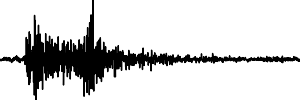

In [ ]:
# example waveform img array
waveform_imgs[0]

In [ ]:
spectrogram_imgs.shape

(10000, 200, 300, 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
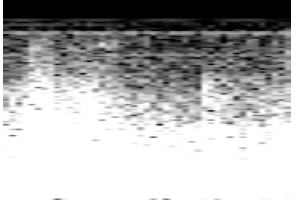

In [ ]:
# example spectrogram img array
spectrogram_imgs[0]

### Example images created through preprocessing

In [ ]:
metadata = metadata.reset_index()

In [ ]:
# Get random example earthquakes
example_earthquakes = metadata[metadata['trace_category']=='earthquake_local'].sample(1000)
example_earthquake_waveforms = waveform_imgs[list(example_earthquakes.index)]
example_earthquake_spectrograms = spectrogram_imgs[list(example_earthquakes.index)]

# Get random example noise
example_noise = metadata[metadata['trace_category']=='noise'].sample(1000)
example_noise_waveforms = waveform_imgs[list(example_noise.index)]
example_noise_spectrograms = spectrogram_imgs[list(example_noise.index)]

In [ ]:
example_earthquakes

,trace_name,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk,weight_for_subsample
4040,B084.PB_20080130195217_EV,PB,B084,EH,33.611570,-116.456370,1271.0,693.0,autopicker,0.86,...,NaN,0.44430,49.41,334.80,[27.29999924 27.10000038 28. ],[[2309.]],2008-01-30 19:52:18.230000,earthquake_local,1,0.000033
5819,B084.PB_20110802135926_EV,PB,B084,EH,33.611570,-116.456370,1271.0,500.0,manual,0.59,...,NaN,0.26360,29.32,282.70,[16.39999962 16.5 20.39999962],[[1765.]],2011-08-02 13:59:27.100000,earthquake_local,1,0.000033
7055,B073.PB_20160610214420_EV,PB,B073,EH,35.946700,-120.471700,535.3,800.0,manual,0.00,...,NaN,0.09009,10.03,306.40,[20.70000076 22. 15.89999962],[[1536.]],2016-06-10 21:44:21.910000,earthquake_local,1,0.000033
6052,B065.PB_20140412075759_EV,PB,B065,EH,36.743667,-121.474167,643.0,800.0,manual,0.59,...,NaN,0.15410,17.14,115.10,[19.60000038 19.29999924 16.29999924],[[1935.]],2014-04-12 07:58:00.720000,earthquake_local,1,0.000033
2152,B084.PB_20160111003428_EV,PB,B084,HH,33.611570,-116.456370,1271.0,500.0,manual,0.62,...,NaN,0.22490,25.01,289.80,[15.19999981 16. 16.39999962],[[1577.]],2016-01-11 00:34:29.130000,earthquake_local,1,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,B082.PB_20150306085903_EV,PB,B082,HH,33.598182,-116.596005,1374.8,399.0,autopicker,0.94,...,NaN,0.17720,19.70,230.00,[31.79999924 38.5 37.70000076],[[1088.]],2015-03-06 08:59:04.850000,earthquake_local,1,0.000033
9836,B086.PB_20110706192459_EV,PB,B086,EH,33.557500,-116.531000,1392.0,381.0,autopicker,0.80,...,NaN,0.49220,54.44,335.20,[11.19999981 5.4000001 25.29999924],[[1833.]],2011-07-06 19:25:00.900000,earthquake_local,1,0.000033
3923,B082.PB_20120308152706_EV,PB,B082,EH,33.598182,-116.596005,1374.8,700.0,manual,0.66,...,NaN,0.27460,30.54,242.10,[22.20000076 22. 19.10000038],[[1738.]],2012-03-08 15:27:07.770000,earthquake_local,1,0.000033
5538,B082.PB_20130702210122_EV,PB,B082,HH,33.598182,-116.596005,1374.8,500.0,manual,0.66,...,NaN,0.12720,14.14,136.10,[34.09999847 28. 24.5 ],[[1233.]],2013-07-02 21:01:23.530000,earthquake_local,1,0.000033


In [ ]:
# Plot example earthquakes - waveforms and spectrograms
def plot_example_earthquakes(trace_names):
    fig, axs = plt.subplots(2,4,figsize=(12,5))
    count=0
    for i, ax in enumerate(axs.flatten()):
        if count < 4:
            trace_name = earthquake_traces[i]
            ind = metadata[metadata['trace_name']==trace_name].index[0]
            ax.imshow(waveform_imgs[ind])
            ax.set_ylabel('Amplitude (Pa)',fontsize=12)
            ax.set_xlabel('Time (s)',fontsize=12)
            mag = metadata.iloc[ind]['source_magnitude']
            dist = metadata.iloc[ind]['source_distance_km']
            ax.set_title(f'Trace {trace_name}\nMagnitude: {mag}\nDistance: {dist} km', fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            trace_name = earthquake_traces[i-4]
            ind = metadata[metadata['trace_name']==trace_name].index[0]
            ax.imshow(spectrogram_imgs[ind])
            ax.set_ylabel('Frequency (Hz)',fontsize=12)
            ax.set_xlabel('Time (s)',fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
        count += 1
    plt.suptitle(f'Example earthquake images',fontsize=14)
    plt.tight_layout()
    plt.show()

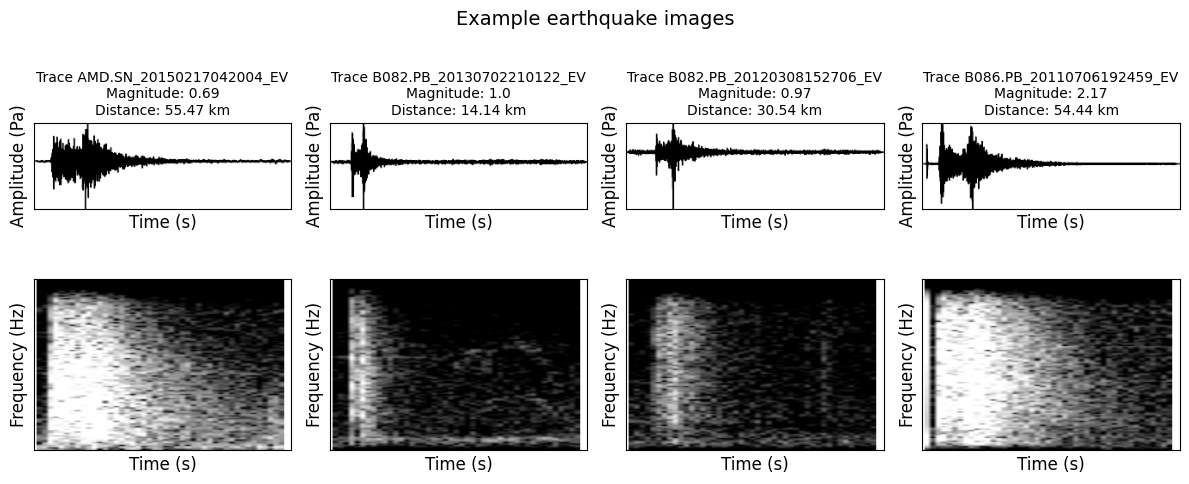

In [ ]:
# Plot some example earthquake waveforms and spectrograms
earthquake_traces = [
    'AMD.SN_20150217042004_EV',
    'B082.PB_20130702210122_EV',
    'B082.PB_20120308152706_EV',
    'B086.PB_20110706192459_EV',
]

plot_example_earthquakes(earthquake_traces)

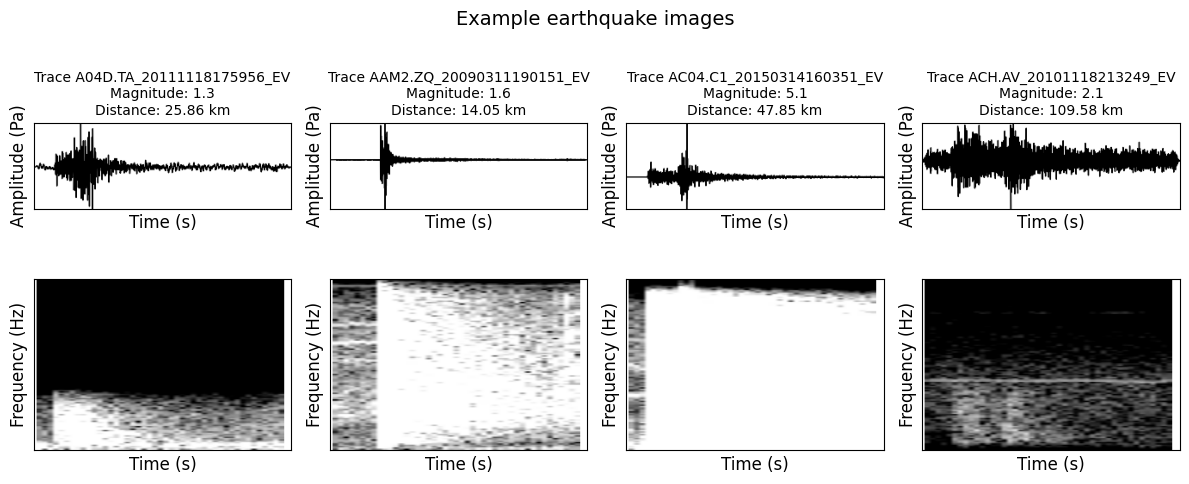

In [ ]:
# Plot some additional earthquake waveforms and spectrograms
earthquake_traces = [
    'A04D.TA_20111118175956_EV',
    'AAM2.ZQ_20090311190151_EV',
    'AC04.C1_20150314160351_EV',
    'ACH.AV_20101118213249_EV'
]

plot_example_earthquakes(earthquake_traces)

In [ ]:
example_noise

,trace_name,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,...,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk,weight_for_subsample
741,NBC7.CN_20180115002842_NO,CN,NBC7,HH,56.267792,-120.842621,676.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 00:28:42,noise,1,0.00005
6499,LABE.9F_20180115045812_NO,9F,LABE,EH,-43.546001,170.244995,1590.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 04:58:12,noise,1,0.00005
5921,NFV.NC_200202102240_NO,NC,NFV,HN,38.467690,-122.896510,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2002-02-10 22:40:00,noise,1,0.00005
6832,ARK1.7F_20100723013800_NO,7F,ARK1,EH,35.266602,-92.403503,176.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2010-07-23 01:38:00,noise,1,0.00005
9400,TRIN.BK_201802230943_NO,BK,TRIN,HN,40.974000,-122.705000,937.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-23 09:43:00,noise,1,0.00005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,AP01.C1_20180116164554_NO,C1,AP01,HH,-18.370800,-70.341900,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-16 16:45:54,noise,1,0.00005
7586,LR05.C1_20180115013800_NO,C1,LR05,HH,-40.229975,-72.004400,203.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 01:38:00,noise,1,0.00005
647,DANT.BK_201710101439_NO,BK,DANT,HH,40.294600,-121.802100,967.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-10 14:39:00,noise,1,0.00005
1100,LNO.UW_201801080450_NO,UW,LNO,HH,45.871000,-118.285000,768.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 04:50:00,noise,1,0.00005


In [ ]:
def plot_example_noise(trace_names):
    fig, axs = plt.subplots(2,4,figsize=(12,5))
    count=0
    for i, ax in enumerate(axs.flatten()):
        if count < 4:
            trace_name = noise_traces[i]
            ind = metadata[metadata['trace_name']==trace_name].index[0]
            ax.imshow(waveform_imgs[ind])
            ax.set_ylabel('Amplitude (Pa)',fontsize=12)
            ax.set_xlabel('Time (s)',fontsize=12)
            ax.set_title(f'Trace {trace_name}', fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            trace_name = noise_traces[i-4]
            ind = metadata[metadata['trace_name']==trace_name].index[0]
            ax.imshow(spectrogram_imgs[ind])
            ax.set_ylabel('Frequency (Hz)',fontsize=12)
            ax.set_xlabel('Time (s)',fontsize=12)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(f'Trace {trace_name}', fontsize=10)
        count += 1
    plt.suptitle(f'Example noise images',fontsize=14)
    plt.tight_layout()
    plt.show()

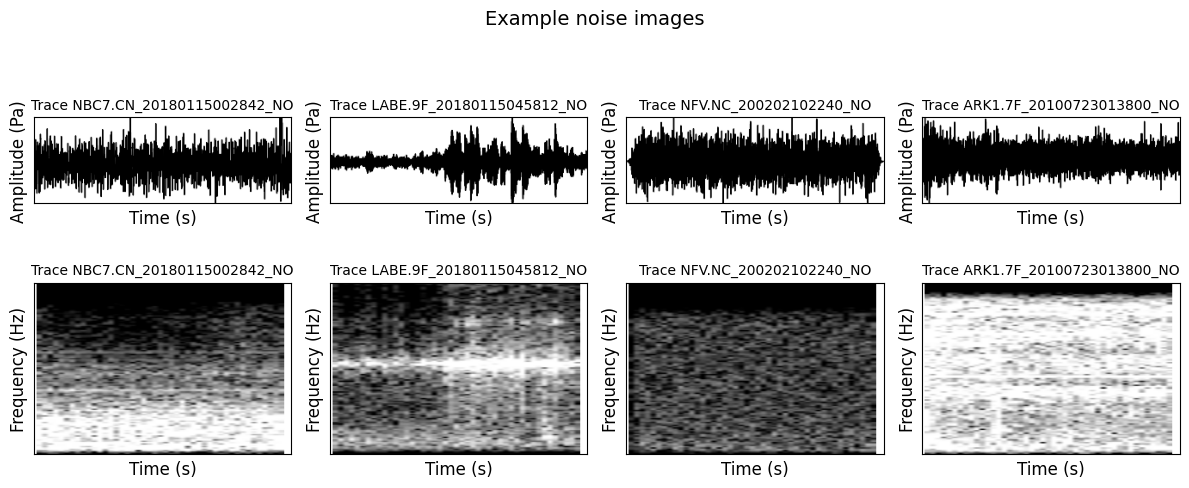

In [ ]:
# Plot some example noise waveforms and spectrograms
noise_traces = [
    'NBC7.CN_20180115002842_NO',
    'LABE.9F_20180115045812_NO',
    'NFV.NC_200202102240_NO',
    'ARK1.7F_20100723013800_NO'
]

plot_example_noise(noise_traces)

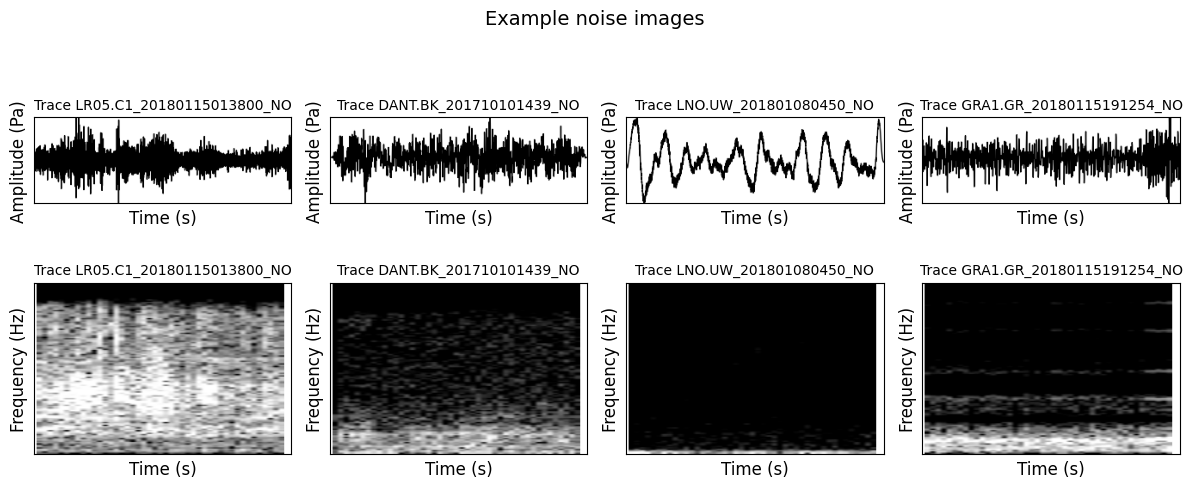

In [ ]:
# Plot some additional noise waveforms and spectrograms
noise_traces = [
    'LR05.C1_20180115013800_NO',
    'DANT.BK_201710101439_NO',
    'LNO.UW_201801080450_NO',
    'GRA1.GR_20180115191254_NO'
]

plot_example_noise(noise_traces)